TODO
- store sigma vals
- compute pixel frequecies for background and foreground
- compter mean pixel intensity for background and foreground
- compute between class variance
- find threshold value that maximizes between class variance

In [36]:
import numpy as np
import PIL
import matplotlib.pyplot as plt 

def otsu_thresholding(image_path):
    thresh_vals = dict()
    sigma = []
    
    # Load image in grayscale
    image = np.array(PIL.Image.open(image_path).convert('L'))  
    
    intensities = np.unique(image)
    vals = np.random.randint(min(intensities), max(intensities), size=(10,))
    
    total_pixels = image.size  
    
    for val in vals:
        num_b = np.sum(image <= val)
        num_f = np.sum(image > val)

        if num_b == 0 or num_f == 0:
            sigma.append(0)
            thresh_vals[val] = 0
            continue
        
        # Compute sum of intensities in background & foreground
        nub = np.sum(image[image <= val])
        nuf = np.sum(image[image > val])
        
        # Compute means
        mean_b = nub / num_b if num_b > 0 else 0
        mean_f = nuf / num_f if num_f > 0 else 0
        
        wb = num_b / total_pixels
        wf = num_f / total_pixels
        
        # Compute Otsu's variance
        variance = wb * wf * (mean_b - mean_f) ** 2
        sigma.append(variance)
        thresh_vals[val] = variance
    
    # Find the threshold with the highest variance
    best_threshold = max(thresh_vals, key=thresh_vals.get)
    
    print("Threshold values:", vals)
    print("Between class variance (σ²):", sigma)
    print("Best threshold value:", best_threshold, "with σ²:", thresh_vals[best_threshold])

    # Apply threshold using NumPy indexing
    thresholded_image = np.where(image > best_threshold, 255, 0).astype(np.uint8)

    # Display thresholded image
    plt.imshow(thresholded_image, cmap='gray')
    plt.title(f"Otsu Thresholding (Threshold={best_threshold})")
    plt.axis("off")
    plt.show()

    return best_threshold


Threshold values: [ 29 113  40  53 186 115 180  15 220  99]
Between class variance (σ²): [85.5482296570391, 2430.2071108238024, 359.81107304524767, 704.423260237824, 1732.426216192609, 2439.665687393461, 1941.2814084321606, 11.824287176763875, 537.8288314082396, 2291.6519150854733]
Best threshold value: 115 with σ²: 2439.665687393461


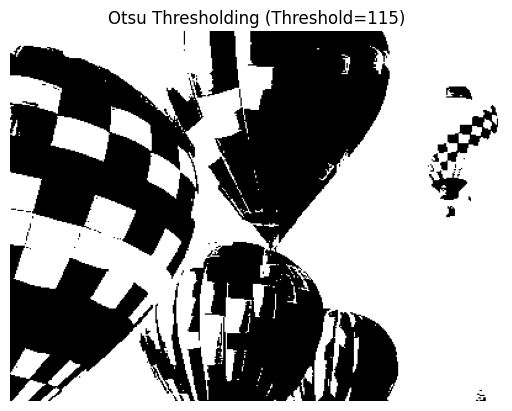

115

In [37]:
otsu_thresholding('./Lab 1.jpg')